# Data manipulation in Pandas

In this notebook we'll introduce some of the basic concepts of the Pandas library for data manipulation. We'll also see simple chart examples using both Pandas and Seaborn.

Pandas holds data in memory. As a general rule of thumb, you should have 5-10 times as much RAM as the size of your dataset.

Be aware that some operations in Pandas are computationally expensive - we won't cover the details here, but you can sometimes speed up your code by orders of magnitude just by doing things in a slightly different way...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.__version__

'0.23.4'

Lots of things are changing in pandas... Version 1.0 is due for release in mid-2019, and will see some big changes. See [this article](https://www.dataschool.io/future-of-pandas/) for an overview. In particular, `inplace` is being deprecated, and the back end will eventually change to Apache Arrow, to improve performance, and because:

    "The more you know about the internals of pandas DataFrame,
    the more horrified you are."

    Wes McKinney @ SciPy 2018

## Basic Pandas data structures

In [3]:
# The most important Pandas objects are the `Series` and the `DataFrame`
s = pd.Series({'x': 10, 'y': 20, 'z': 30})
s

x    10
y    20
z    30
dtype: int64

In [4]:
# We can slice a series in a similar way to a Python list
s[:2]

x    10
y    20
dtype: int64

In [5]:
# We can also select using the index
s['y']

20

In [6]:
s[['x', 'z']]

x    10
z    30
dtype: int64

When slicing a series, pandas returns a view, similar to what we saw with python lists

In [7]:
s = pd.Series(np.random.randn(100))
s.head()

0    0.508850
1    1.040655
2   -0.410105
3    0.350296
4   -0.731176
dtype: float64

In [8]:
s2 = s[:10]
s2.head()

0    0.508850
1    1.040655
2   -0.410105
3    0.350296
4   -0.731176
dtype: float64

In [9]:
s2[:] = 99

In [10]:
s2.head()

0    99.0
1    99.0
2    99.0
3    99.0
4    99.0
dtype: float64

In [11]:
s.head()

0    99.0
1    99.0
2    99.0
3    99.0
4    99.0
dtype: float64

In [12]:
s2 = s.copy()

But this behaviour becomes more complex when we use other slicing / indexing methods, or for DataFrames. If in doubt, do it explicitly instead of relying on implicit behaviour.

### DataFrames

A DataFrame is like a SAS dataset or a R dataframe (or tibble). Each column of a DataFrame is a Series.

In [13]:
df = pd.DataFrame({'x': np.random.randn(100), 
                   'y': np.random.randint(0, 100, 100),
                   'z': np.random.choice(list('abcde'), 100)})

In [18]:
df.head(10)

,x,y
z,,
b,1.176999,78
e,0.943235,86
c,0.042176,54
a,-1.022879,91
c,-0.214401,1
d,1.474252,80
e,2.322957,57
e,0.417631,74
b,1.718458,13


In [15]:
df.dtypes

x    float64
y      int32
z     object
dtype: object

### Indexing and selection

We are only going to scratch the surface of selecting from Series and DataFrames. For more info, see the Pandas documentation or (better) the [Python Data Science Handbook, chapter 3](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)

In [16]:
# Lets set an index on the DataFrame:
df.set_index('z', inplace=True)
df.head()

,x,y
z,,
b,1.176999,78
e,0.943235,86
c,0.042176,54
a,-1.022879,91
c,-0.214401,1


In [17]:
# Now we can select all records where the index = 'c':
df.loc['c'].head()

,x,y
z,,
c,0.042176,54
c,-0.214401,1
c,0.024827,64
c,0.193236,78
c,-0.886793,85


In [19]:
# .loc looks at the "explicit" index - i.e. the one we've defined. In contrast, .iloc looks at the "implicit" 
# index, which is just the row number. So to select rows 5 to 9:
df.iloc[5:10]

,x,y
z,,
d,1.474252,80
e,2.322957,57
e,0.417631,74
b,1.718458,13
e,-0.215095,58


You may see some examples on the web that use the .ix method for indexing. Don't do this - it's deprecated.

It's often unclear whether pandas will return a view or a copy of a series or dataframe. If in doubt, do it explicitly! For example, lets say we want to assign a new value to the 'x' column, for all rows where the index = 'c'. We might think we could do this by taking a slice and then assigning to it:

In [20]:
df_slice = df.loc['c']
df_slice.head()

,x,y
z,,
c,0.042176,54
c,-0.214401,1
c,0.024827,64
c,0.193236,78
c,-0.886793,85


In [21]:
# We could try to do this by assigning to the slice:
df_slice.loc['x'] = 99

C:\Users\stephen_webb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


If you see that warning message, you should probably look for another way of doing things. In this case, our slice was actually a copy, so pandas is warning us that we might not be doing what we think we're doing. Here's a better way:

In [22]:
df.loc['c', 'x'] = 99

In [23]:
df.loc['c'].head()

,x,y
z,,
c,99.0,54
c,99.0,1
c,99.0,64
c,99.0,78
c,99.0,85


We'll see some more indexing examples below

### Read our dataset - the Tableau superstore data!

In [24]:
try:
    superstore = pd.read_excel('data/superstore.xlsx')
except FileNotFoundError:
    superstore = pd.read_excel('https://query.data.world/s/n2pyux2nabxy4c43zl3uugxsk5gt6v')

In [27]:
# Quick check: do we have the right number of rows?
assert len(superstore) == 51290

In [28]:
type(superstore)

pandas.core.frame.DataFrame

In [29]:
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


### A few basic data exploration tasks

In [30]:
# Basic summary of the table
superstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row ID            51290 non-null int64
Order ID          51290 non-null object
Order Date        51290 non-null datetime64[ns]
Ship Date         51290 non-null datetime64[ns]
Ship Mode         51290 non-null object
Customer ID       51290 non-null object
Customer Name     51290 non-null object
Segment           51290 non-null object
Postal Code       9994 non-null float64
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Region            51290 non-null object
Market            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null fl

In [31]:
# How many countries do we have?
superstore['Country'].nunique()

165

In [36]:
# List of countries
superstore['Country'].value_counts()

United States            9994
Australia                2837
France                   2827
Mexico                   2635
Germany                  2063
China                    1880
United Kingdom           1633
Brazil                   1593
India                    1554
Indonesia                1390
Turkey                   1378
Italy                    1100
Nigeria                   905
Spain                     859
Dominican Republic        742
El Salvador               736
Cuba                      724
Honduras                  713
Philippines               681
New Zealand               628
Nicaragua                 614
Iran                      607
Guatemala                 521
Egypt                     487
South Africa              457
Morocco                   451
Netherlands               435
Argentina                 390
Panama                    388
Iraq                      388
                         ... 
Republic of the Congo       6
Lesotho                     6
Burkina Fa

In [42]:
# Total sales
superstore['Sales'].sum()

12642501.90988

In [38]:
# Number of unique values for each column
superstore.nunique()

Row ID            51290
Order ID          25728
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID       17415
Customer Name       796
Segment               3
Postal Code         631
City               3650
State              1102
Country             165
Region               23
Market                5
Product ID         3788
Category              3
Sub-Category         17
Product Name       3788
Sales             24988
Quantity             14
Discount             27
Profit            27085
Shipping Cost     16499
Order Priority        4
dtype: int64

### Quick look at the distributions of numeric variables

In [43]:
superstore.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.478567
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.251373
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [44]:
plotdata = superstore.select_dtypes('number').drop('Postal Code', axis=1)
plotdata.dtypes

Row ID             int64
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
Shipping Cost    float64
dtype: object

C:\Users\stephen_webb\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


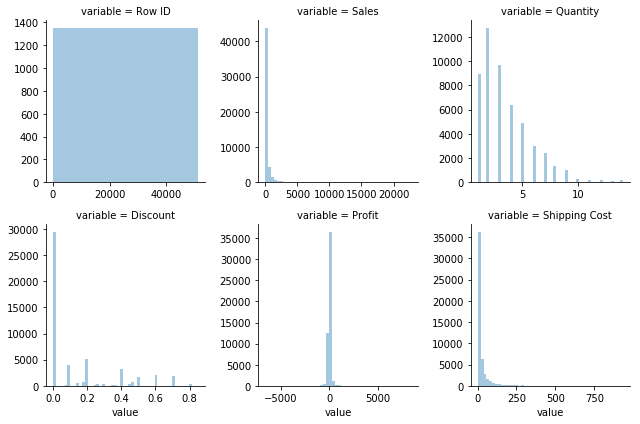

In [46]:
g = sns.FacetGrid(plotdata.melt(), col='variable', col_wrap=3, sharey=False, sharex=False)
g.map(sns.distplot, 'value', kde=False);

### Aggregations: [Split, apply, combine](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html#GroupBy:-Split,-Apply,-Combine)

In [47]:
# Sales by segment
# select sum(Sales) from superstore group by Segment
superstore.groupby('Segment')['Sales'].sum()

Segment
Consumer       6.507949e+06
Corporate      3.824698e+06
Home Office    2.309855e+06
Name: Sales, dtype: float64

In [48]:
# Sales by market and segment
# select sum(Sales) from superstore group by Market, Segment
superstore.groupby(['Market', 'Segment'])['Sales'].sum()

Market        Segment    
Africa        Consumer       4.237668e+05
              Corporate      2.049390e+05
              Home Office    1.550674e+05
Asia Pacific  Consumer       2.056466e+06
              Corporate      1.215139e+06
              Home Office    7.710532e+05
Europe        Consumer       1.696749e+06
              Corporate      1.033907e+06
              Home Office    5.566802e+05
LATAM         Consumer       1.133847e+06
              Corporate      6.452525e+05
              Home Office    3.855057e+05
USCA          Consumer       1.197120e+06
              Corporate      7.254601e+05
              Home Office    4.415485e+05
Name: Sales, dtype: float64

In [49]:
# We can store the results of a query in an object:
sales_summary = superstore.groupby(['Market', 'Segment'])['Sales'].sum()
type(sales_summary)

pandas.core.series.Series

In [50]:
# We now have an example of a 'multi-index' (or hierarchical index)
sales_summary.index

MultiIndex(levels=[['Africa', 'Asia Pacific', 'Europe', 'LATAM', 'USCA'], ['Consumer', 'Corporate', 'Home Office']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['Market', 'Segment'])

In [51]:
# What were the sales figures for Asia Pacific?
sales_summary['Asia Pacific']

Segment
Consumer       2.056466e+06
Corporate      1.215139e+06
Home Office    7.710532e+05
Name: Sales, dtype: float64

In [52]:
# What were the sales for Consumer and Corporate segments in Europe?
sales_summary.loc[('Europe', ['Consumer', 'Corporate'])]

Market  Segment  
Europe  Consumer     1.696749e+06
        Corporate    1.033907e+06
Name: Sales, dtype: float64

### Basic plotting: Sales by month

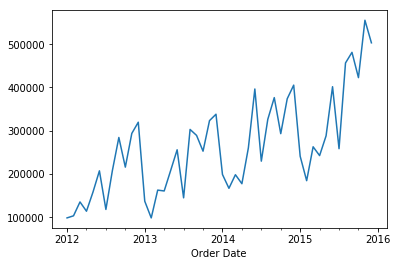

In [53]:
superstore.set_index('Order Date').resample('1M')['Sales'].sum().plot();

### A bar chart: Sales by market

This demonstrates how getting a chart to look just the way you want it can get very fiddly very quickly! That's where recent plotting libraries such as Seaborn, Plotly, Chartify etc can be better than the built-in Pandas plotting methods, or doing it from scratch in matplotlib. 

In [54]:
# First, choose our bar colour. By default, pandas uses a different colour for each bar - nasty!
colours = sns.color_palette('tab20') 
bar_colour = colours[0]

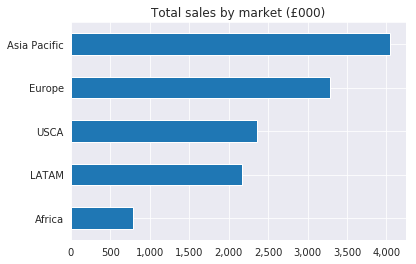

In [55]:
with sns.axes_style('darkgrid'):
    ax = superstore.groupby('Market')['Sales'].sum().sort_values().plot.barh(color=bar_colour)

    plt.title("Total sales by market (£000)")
    ax.yaxis.label.set_visible(False)
    
    # Now format the axis labels. It really shouldn't be this hard...
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:,.0f}'.format(x/1000) for x in vals]) 

### Transformations: creating new columns etc

In [57]:
# Group by ... and create profit ratio column (profit / sales)
grouped = superstore.groupby('Segment')[['Sales', 'Profit']].sum()

In [58]:
grouped

,Sales,Profit
Segment,,
Consumer,6.507949e+06,749239.78206
Corporate,3.824698e+06,441208.32866
Home Office,2.309855e+06,277009.18056


In [59]:
grouped['profit_ratio'] = grouped['Profit'] / grouped['Sales']
grouped

,Sales,Profit,profit_ratio
Segment,,,
Consumer,6.507949e+06,749239.78206,0.115127
Corporate,3.824698e+06,441208.32866,0.115358
Home Office,2.309855e+06,277009.18056,0.119925


Merges etc. Contrast SQL - which has to run on a database - with Pandas, which runs in memory. 
